# Autoencoders for image compression using the cifar10 dataset

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, BatchNormalization, Dense, Input, UpSampling2D
import tensorflow as tf
import pandas as pf
tf.__version__


'2.9.2'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

### Visualizing the images

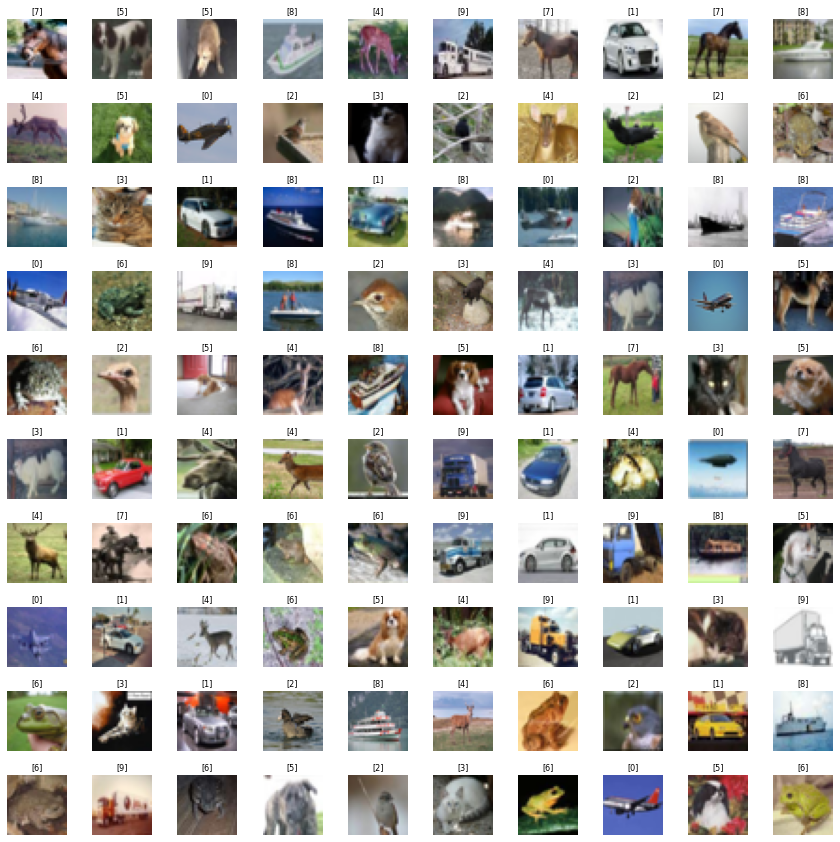

In [7]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15, 15))
axes = axes.ravel()
for i in np.arange(0, width * height):
  index = np.random.randint(0, 50000)
  axes[i].imshow(x_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

### Pre-processing the images

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Building and training the convolutional autoencoder

In [16]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [17]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [18]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 19s 7ms/step - loss: 0.5817 - accuracy: 0.6557
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5680 - accuracy: 0.7244
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5649 - accuracy: 0.7388
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5636 - accuracy: 0.7462
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5626 - accuracy: 0.7531
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5620 - accuracy: 0.7545
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5617 - accuracy: 0.7567
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5610 - accuracy: 0.7592
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5607 - accuracy: 0.7602
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - 

### Encoding and decoding the test images

In [21]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                                
                                                      

In [24]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_14').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 average_pooling2d_12 (Avera  (None, 16, 16, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        18464     
                                                             

In [40]:
coded_test_images = encoder.predict(x_test)
coded_test_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 4, 4, 16)

In [41]:
coded_test_images[0]

array([[[-3.56551409e-01,  3.56854528e-01, -3.63375843e-02,
         -2.24518597e-01,  1.04451656e-01,  8.68781656e-03,
          4.25259888e-01, -7.00069666e-02, -1.29325330e-01,
          2.85584629e-02, -4.10648622e-02, -1.48541182e-01,
         -1.29119515e-01, -4.02066857e-02, -1.00047183e+00,
          4.28875804e-01],
        [-1.37696385e-01,  2.62010127e-01,  2.52527177e-01,
         -1.12518352e-02,  9.02672485e-02, -2.79769510e-01,
          2.53570914e-01,  4.21219558e-01, -4.83822346e-01,
          1.49791598e-01, -2.84867287e-01,  4.01673615e-02,
          5.67309409e-02,  1.23538032e-01, -7.56579399e-01,
          3.06443244e-01],
        [-1.95335031e-01,  6.00903690e-01, -2.92086959e-01,
         -1.06549904e-01,  1.54718846e-01, -2.34327108e-01,
          3.12885433e-01, -1.24213204e-01,  1.59211934e-01,
         -6.75490201e-02,  1.88023239e-01, -1.16312087e-01,
         -5.46563119e-02, -5.52990735e-02, -6.45761728e-01,
          3.26064467e-01],
        [-3.9624965

In [42]:
decoded_test_images = encoder.predict(x_test)
decoded_test_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 4, 4, 16)

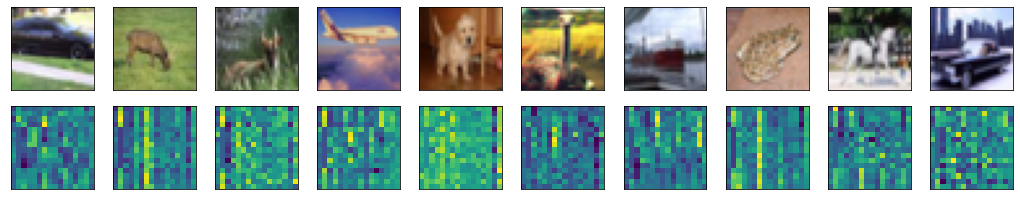

In [45]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(x_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())
    
  # Coded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())
